In [59]:
import pandas as pd
import numpy as np
import russ_risk_kit as rrk
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing Dataset
1. Import dataset
2. filter low 20 and high 20 
3. transform returns to decimal form

In [63]:
returns = rrk.getff_ret()
returns.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


<AxesSubplot:>

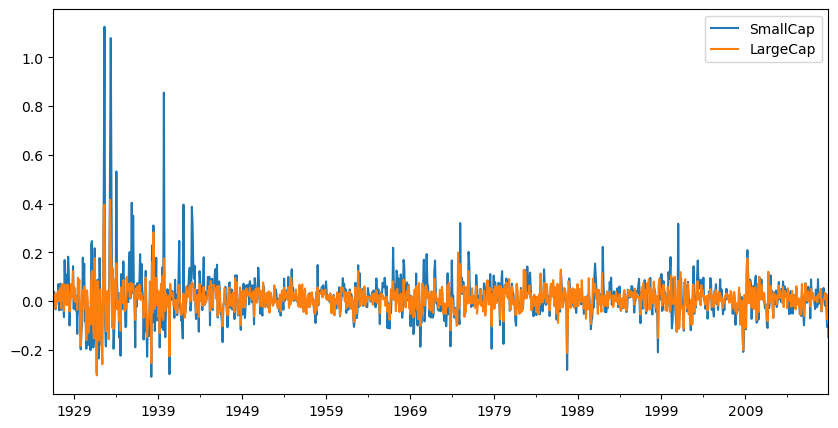

In [87]:
returns.plot.line(figsize=(10,5))

**What was the Annualized Volatility of the Lo 20 portfolio over the entire period?**

**What was the Annualized Volatility of the Hi 20 portfolio over the entire period?**

In [64]:
rrk.annualized_vol(returns,12)

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

**What was the Annualized Return of the Lo 20 portfolio over the entire period?**

**What was the Annualized Return of the Hi 20 portfolio over the entire period?**

In [65]:
rrk.annualized_ret(returns,12)

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

**What was the Annualized Return of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)?**

**What was the Annualized Return of the Hi 20 portfolio over the period  1999 - 2015 (both inclusive)?**

In [66]:
print(rrk.annualized_ret(returns['1999':'2015'],12))

SmallCap    0.114426
LargeCap    0.062865
dtype: float64


**What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)?**

**What was the Annualized Volatility of the Hi 20 portfolio over the period  1999 - 2015 (both inclusive)?**

In [67]:
print(rrk.annualized_vol(returns['1999':'2015'],12))

SmallCap    0.228894
LargeCap    0.172713
dtype: float64


**What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio?**



In [69]:
rrk.drawdown(returns['1999':'2015']["SmallCap"])['Drawdown'].min()

-0.6248092431236988

**At the end of which month over the period 1999-2015 did that maximum drawdown on the SmallCap (Lo 20) portfolio occur?**


In [70]:
rrk.drawdown(returns['1999':'2015']["SmallCap"])['Drawdown'].idxmin()

Period('2009-02', 'M')

***What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the LargeCap (Hi 20) portfolio?***

In [71]:
rrk.drawdown(returns['1999':'2015']["LargeCap"])['Drawdown'].min()

-0.5527349978713653

***Over the period 1999-2015, at the end of which month did that maximum drawdown of the LargeCap (Hi 20) portfolio occur?***

In [72]:
rrk.drawdown(returns['1999':'2015']["LargeCap"])['Drawdown'].idxmin()

Period('2009-02', 'M')

**For the remaining questions, use the EDHEC Hedge Fund Indices data set that we used in the lab assignment and load them into Python. Looking at the data since 2009 (including all of 2009) through 2018 which Hedge Fund Index has exhibited the highest semideviation?**    



In [79]:
hfi = rrk.get_hfi_returns()

/Users/russ/Desktop/Course on py/data/russ_risk_kit.py:59: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi = pd.read_csv('/Users/russ/Desktop/Course on py/data/edhec-hedgefundindices.csv',


**Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has exhibited the lowest semideviation?**

In [94]:
rrk.semideviation1(hfi['2009':]).sort_values()

Fixed Income Arbitrage    0.006490
Equity Market Neutral     0.007202
Merger Arbitrage          0.007640
Relative Value            0.009502
Global Macro              0.009689
Convertible Arbitrage     0.010382
Funds Of Funds            0.012246
Event Driven              0.015833
Distressed Securities     0.016712
Long/Short Equity         0.018519
CTA Global                0.019215
Emerging Markets          0.023606
Short Selling             0.031207
dtype: float64

**Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has been most negatively skewed?**     

In [92]:
rrk.skewness(hfi['2009':]).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

***Looking at the data since 2000 (including all of 2000) through 2018 which Hedge Fund Index has exhibited the highest kurtosis?***

In [93]:
rrk.kurtosis(hfi['2000':]).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64